<a href="https://colab.research.google.com/github/Jzhang011127/cs411-group-23/blob/main/hw06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS237 - Fall 2023 - Programming Assignment
## Due Wednesday, October 18th at 09:00 PM in Gradescope

In this programming assignment, we are going to run a Monte Carlo simulation.

Submit your programming assignment by filling in this notebook with your solutions. Write all your code in this file, **be sure to click on Runtime-> Run all and verify that everything works as you intended**, and then upload the `ipynb` file to Gradescope.

### Notes:
* You can reuse the code provided in this and previous homework descriptions.
* You are obliged to go to "Runtime->Run All" and execute all cells before downloading the .ipynb file.
* Do your best to follow these principles:
 * **Correctness**: your code should be free of error. Debug it as many times as possible.
 * **Clarity**: write high-quality comments, functions, and variable naming
 * **Simplicity**: write your solution in the assigned cells, don't create new cells or reorder them.
 * **Completeness**: the solution to all problems must be included in one Python notebook, and no function should be blank.
 * **Authenticity**, since we assume that you posted your code written by you.

# Estimating $\pi$ by througing darts

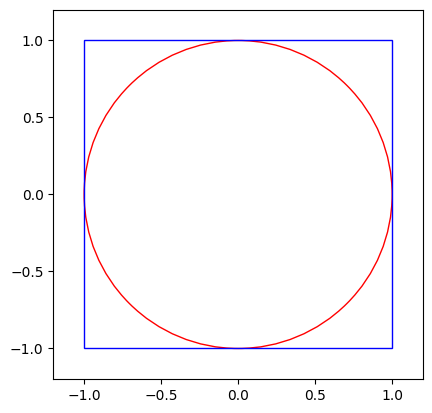

In [11]:
#@title Imagine building yourself a dartboard represented by a circle of radius $r=1$ centered at the coordinate (0,0), inside a square of side 2.
import matplotlib.pyplot as plt
figure, axes = plt.subplots()
plt.ylim(-1.2, 1.2)
plt.xlim(-1.2, 1.2)
axes.set_aspect( 1 )
axes.add_artist( plt.Circle((0, 0 ),1,fill = False ,ec="red") )
axes.add_artist( plt.Rectangle((-1,-1), 2, 2, fill=False,ec="blue") )

Now think about throwing some darts at this board. What's the probability each dart will land inside the circle? Easy enough — it's the circle's area divided by the square's area.

$$
\Pr(\text{dart in the circle}) = \frac{\pi r^2}{4 r ^2} = \frac{\pi}{4}
$$

Now we have a straightforward expression we can use in practice to estimate $\pi$.

In [12]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import random
import math

## 1 - Implementation of a continuous random variable
Let R be a random variable with Range(R) = [0,1]. Let P=aR+b be a continuous random variable that returns a random value between [-1,1].
Your first task is to finish the function `p()` that represents the random variable P by assigning correct values to the constants `a` and `b`.



In [13]:
# Use this function to implement p()
def r():
  return random.random()

# this function must return a value between [-1,1]
# a and b must be constant values
def p():
  a = 2 #?
  b = -1 #?
  return a*r()+b

# returns a point tuple
def throw():
  point = (p(),p())
  return point


## 2 - Identifying events

Complete the code of the function `in_circle(point)`. This function takes as input a coordinate (x,y) represented by the tuple `point` in which `x = point[0]` and `y = point[1]`, given by the function `throw()`. The function `in_circle(point)` works as a random variable and returns `True` if the input point is inside a circle or radius `r=1` centered at the coordinate (0,0), i.e., if the event "dart in the circle" occurred. Otherwise, it returns `False`.

In [14]:

def in_circle(point):
  x = point[0]
  y = point[1]
  return ((x*x)+(y*y)<=1)
  #pass

## 3 - Simulation and estimation
To simulate the dart throwing, we will use 1000 darts, the function `throw()` to generate hits in the board and the function in_circle(point) to verify whether the dart is in the circle. Here it is your job to:
 - Count the number of successful darts: use the variable hit to store how many times we have a dart in the circle
 - Estimate the value of $\pi$: compute the current estimation of the value of $\pi$ for every dart you throw and store it in the variable `estimation`. Reread the beginning of this problem description if you struggle to find the answer.
 - Print the estimated value of $\pi$ you found.

In [15]:
number_of_darts = 1000
# Generate coordinates in the board
throws = [throw() for t in range(number_of_darts)]

hit = 0

# Variables x and y will be used in part 4
x = []
y = []

# Run the simulatiion for every dart
for dart in range(number_of_darts):
  # insert your code here
  if in_circle(throws[dart]):
    hit += 1
  estimation = ((hit*4)/(dart+1))
  x.append(dart)
  y.append(estimation)

## 4 - Output
Once you have implemented the previous functions correctly, you should be able to run the following code cell and see two graphs:
 1. A graphical representation of the coordinates in the dartboard.
 2. The accuracy of your $\pi$ estimation as the number of darts increases.

 There is nothing to code here, but to be graded, you must run all cells of this Python notebook on GoogleColab and immediately submit your .ipynb to Gradescope.

 Make sure you can see the two graphs on Gradescope. If you can't see them, it is because you didn't save you Python Notebook correctly.

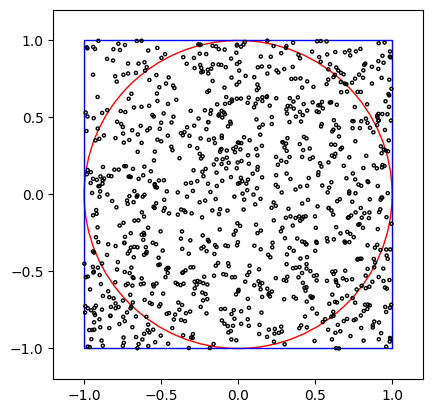

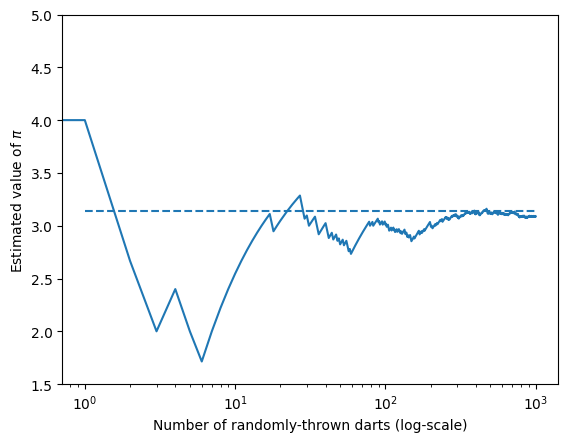

In [16]:
# DON'T CHANGE THIS CODE!!!
figure, axes = plt.subplots()
plt.ylim(-1.2, 1.2)
plt.xlim(-1.2, 1.2)
axes.set_aspect( 1 )
axes.add_artist( plt.Circle((0, 0 ),1,fill = False ,ec="red") )
axes.add_artist( plt.Rectangle((-1,-1), 2, 2, fill=False,ec="blue") )
for t in range(number_of_darts):
    axes.add_artist( plt.Circle(throws[t],0.01,fill = False ) )

fig, ax = plt.subplots()
ax.plot(x, y)
ax.hlines(y=math.pi, xmin=1, xmax=number_of_darts+1, linestyles="--")  # horizontal line at true value of pi
ax.set_xscale("log")
ax.set_ylabel(r"Estimated value of $\pi$")
ax.set_xlabel("Number of randomly-thrown darts (log-scale)")
plt.ylim(1.5, 5)
plt.show()